## Jamboree Education
Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective. 

**Column Profiling:**

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)


**Problem Statment:** Predict the chances of graduate admission based on the given features.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
ja = pd.read_csv("Jamboree_Admission.csv")

In [3]:
ja.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
ja.shape

(500, 9)

In [5]:
ja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
ja.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
ja.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Univariate Analysis

In [8]:
for i in ja.columns:
    print(i,":",ja[i].nunique())

Serial No. : 500
GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR  : 9
CGPA : 184
Research : 2
Chance of Admit  : 61


In [9]:
for i in ja.columns:
    print(i)
    print(ja[i].value_counts())
    print("____________________________")

Serial No.
1      1
330    1
343    1
342    1
341    1
      ..
162    1
161    1
160    1
159    1
500    1
Name: Serial No., Length: 500, dtype: int64
____________________________
GRE Score
312    24
324    23
316    18
321    17
327    17
322    17
320    16
314    16
311    16
317    15
325    15
315    13
323    13
308    13
304    12
326    12
313    12
300    12
318    12
319    12
305    11
310    11
301    11
307    10
299    10
298    10
329    10
328     9
331     9
340     9
309     9
330     8
332     8
334     8
306     7
302     7
297     6
303     5
296     5
295     5
336     5
338     4
333     4
335     4
339     3
294     2
290     2
337     2
293     1
Name: GRE Score, dtype: int64
____________________________
TOEFL Score
110    44
105    37
104    29
106    28
107    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
113    19
108    19
109    19
114    18
116    16
115    11
98     10
118    10
119    10
120     9
117     8
97      7
96    

In [10]:
ja.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
ja_cat_cols = ['University Rating', 'SOP', 'LOR ','Research']
round((ja[ja_cat_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(ja))*100,2)

value
variable          value       
LOR               1.0      0.2
                  1.5      2.2
                  2.0      9.2
                  2.5     10.0
                  3.0     19.8
                  3.5     17.2
                  4.0     18.8
                  4.5     12.6
                  5.0     10.0
Research          0.0     44.0
                  1.0     56.0
SOP               1.0      1.2
                  1.5      5.0
                  2.0      8.6
                  2.5     12.8
                  3.0     16.0
                  3.5     17.6
                  4.0     17.8
                  4.5     12.6
                  5.0      8.4
University Rating 1.0      6.8
                  2.0     25.2
                  3.0     32.4
                  4.0     21.0
                  5.0     14.6

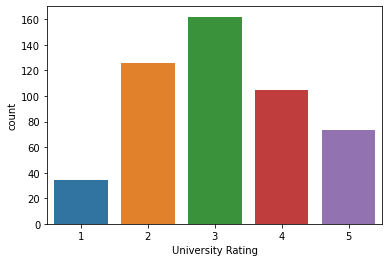

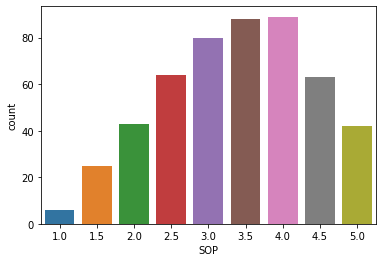

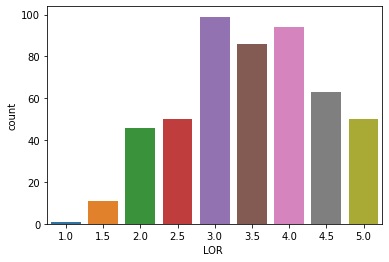

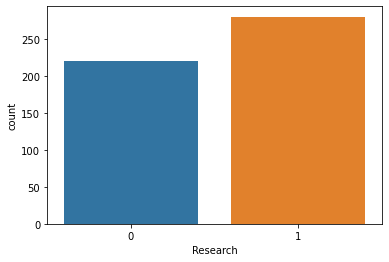

In [12]:
for i in ja_cat_cols:
    plt.figure(i)
    sns.countplot(x=i,data=ja)

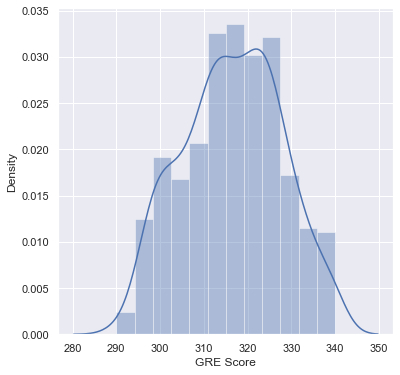

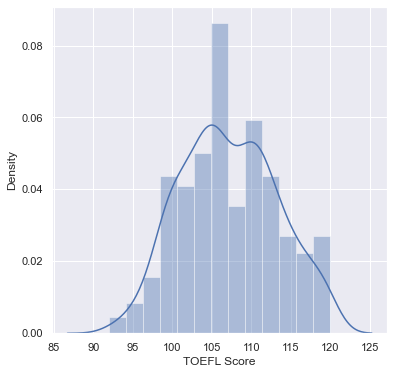

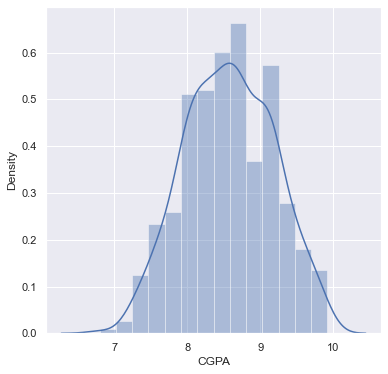

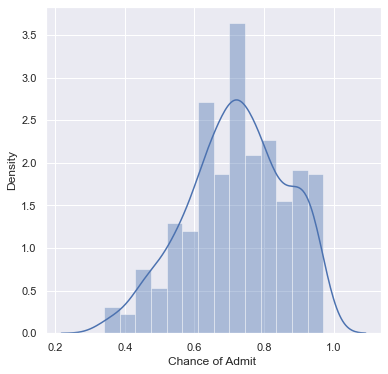

In [13]:
ja_num_cols = ['GRE Score', 'TOEFL Score', 'CGPA','Chance of Admit ']
sns.set(rc={'figure.figsize':(6,6)})
for i in ja_num_cols:
    plt.figure(i)
    sns.distplot(ja[i])

<AxesSubplot:xlabel='Chance of Admit '>

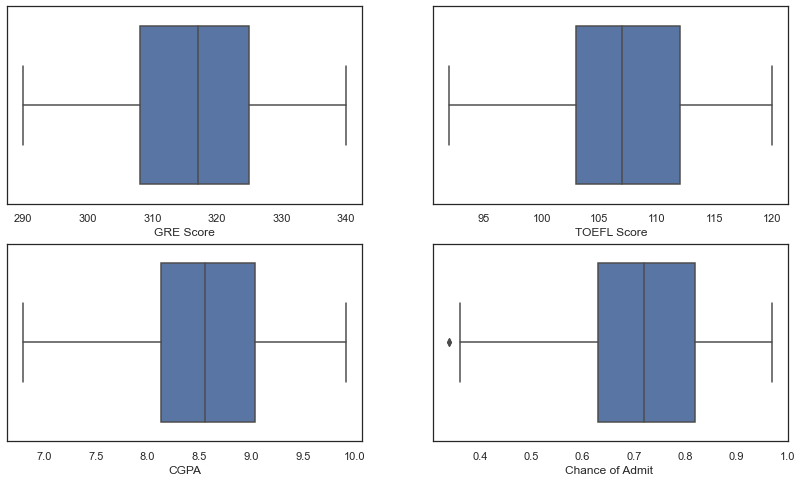

In [14]:
ja_num_cols = ['GRE Score', 'TOEFL Score', 'CGPA','Chance of Admit ']
sns.set_style("white")

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
sns.boxplot(data=ja,x='GRE Score',ax=axs[0][0])
sns.boxplot(data=ja,x='TOEFL Score',ax=axs[0][1])
sns.boxplot(data=ja,x='CGPA',ax=axs[1][0])
sns.boxplot(data=ja,x='Chance of Admit ',ax=axs[1][1])


There is no outliers present in dataset

### Bivariate Analysis

In [15]:
ja_cat_cols = ['University Rating', 'SOP', 'LOR ','Research']

In [16]:
ja[['GRE Score', 'TOEFL Score', 'CGPA']].corr()

,GRE Score,TOEFL Score,CGPA
GRE Score,1.000000,0.827200,0.825878
TOEFL Score,0.827200,1.000000,0.810574
CGPA,0.825878,0.810574,1.000000


<AxesSubplot:xlabel='GRE Score', ylabel='TOEFL Score'>

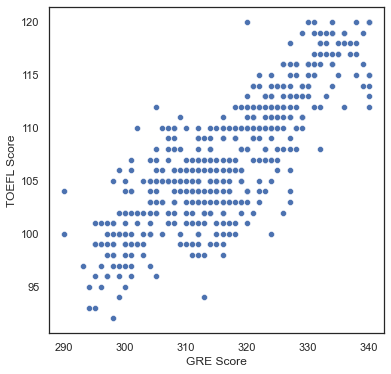

In [17]:
sns.scatterplot(ja['GRE Score'],ja['TOEFL Score'])

<AxesSubplot:xlabel='GRE Score', ylabel='CGPA'>

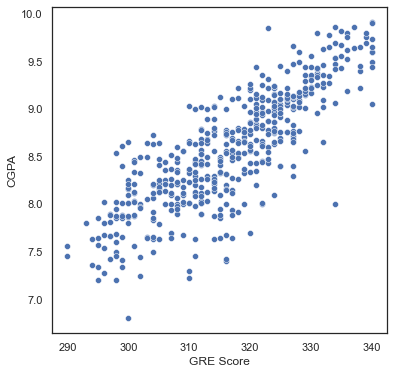

In [18]:
sns.scatterplot(ja['GRE Score'],ja['CGPA'])

<AxesSubplot:xlabel='TOEFL Score', ylabel='CGPA'>

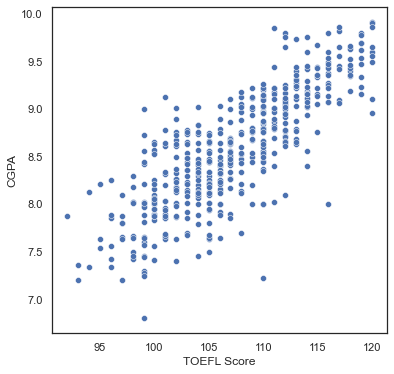

In [19]:
sns.scatterplot(ja['TOEFL Score'],ja['CGPA'])

there is a linear correlation between the continuous variables and the target variable.

<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

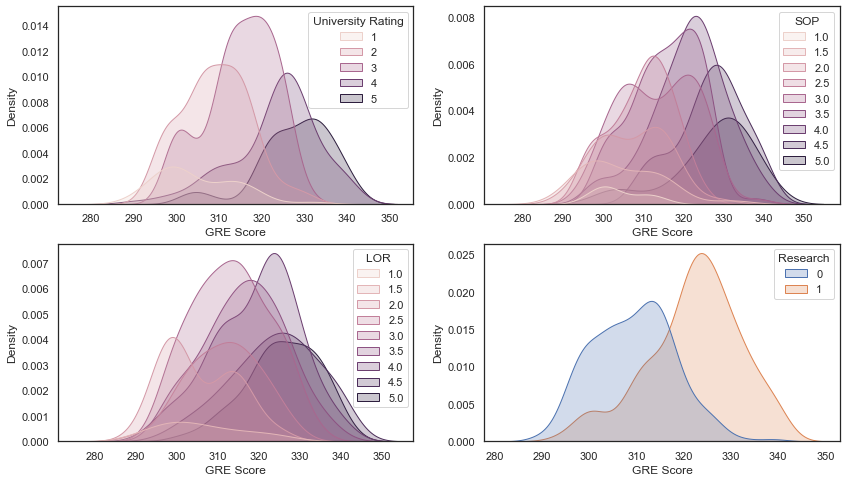

In [20]:
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

sns.kdeplot(data=ja,x='GRE Score', hue='University Rating',fill=True,ax=axs[0][0])
sns.kdeplot(data=ja,x='GRE Score', hue='SOP',fill=True,ax=axs[0][1])
sns.kdeplot(data=ja,x='GRE Score', hue='LOR ',fill=True,ax=axs[1][0])
sns.kdeplot(data=ja,x='GRE Score', hue='Research',fill=True,ax=axs[1][1])

<AxesSubplot:xlabel='TOEFL Score', ylabel='Density'>

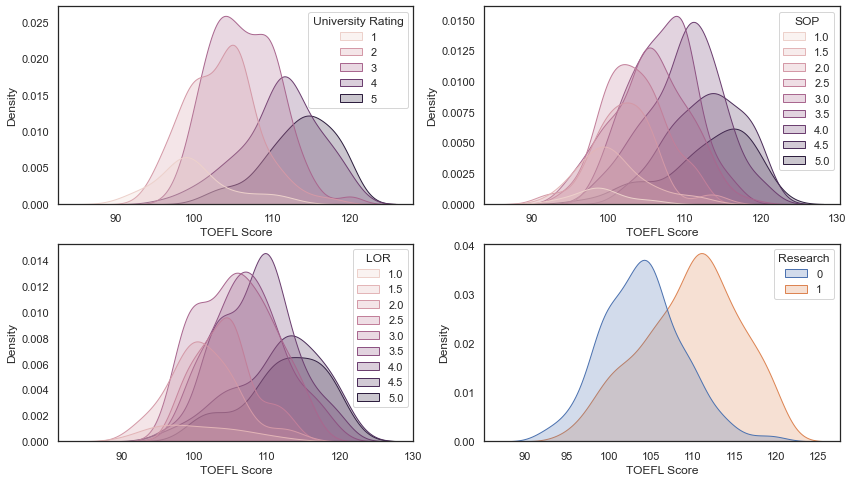

In [21]:
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

sns.kdeplot(data=ja,x='TOEFL Score', hue='University Rating',fill=True,ax=axs[0][0])
sns.kdeplot(data=ja,x='TOEFL Score', hue='SOP',fill=True,ax=axs[0][1])
sns.kdeplot(data=ja,x='TOEFL Score', hue='LOR ',fill=True,ax=axs[1][0])
sns.kdeplot(data=ja,x='TOEFL Score', hue='Research',fill=True,ax=axs[1][1])

<AxesSubplot:xlabel='CGPA', ylabel='Density'>

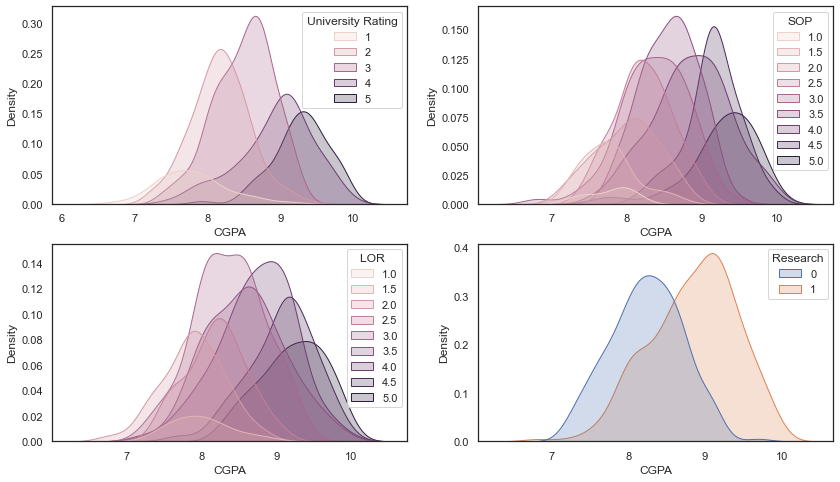

In [22]:
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

sns.kdeplot(data=ja,x='CGPA', hue='University Rating',fill=True,ax=axs[0][0])
sns.kdeplot(data=ja,x='CGPA', hue='SOP',fill=True,ax=axs[0][1])
sns.kdeplot(data=ja,x='CGPA', hue='LOR ',fill=True,ax=axs[1][0])
sns.kdeplot(data=ja,x='CGPA', hue='Research',fill=True,ax=axs[1][1])

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit '>

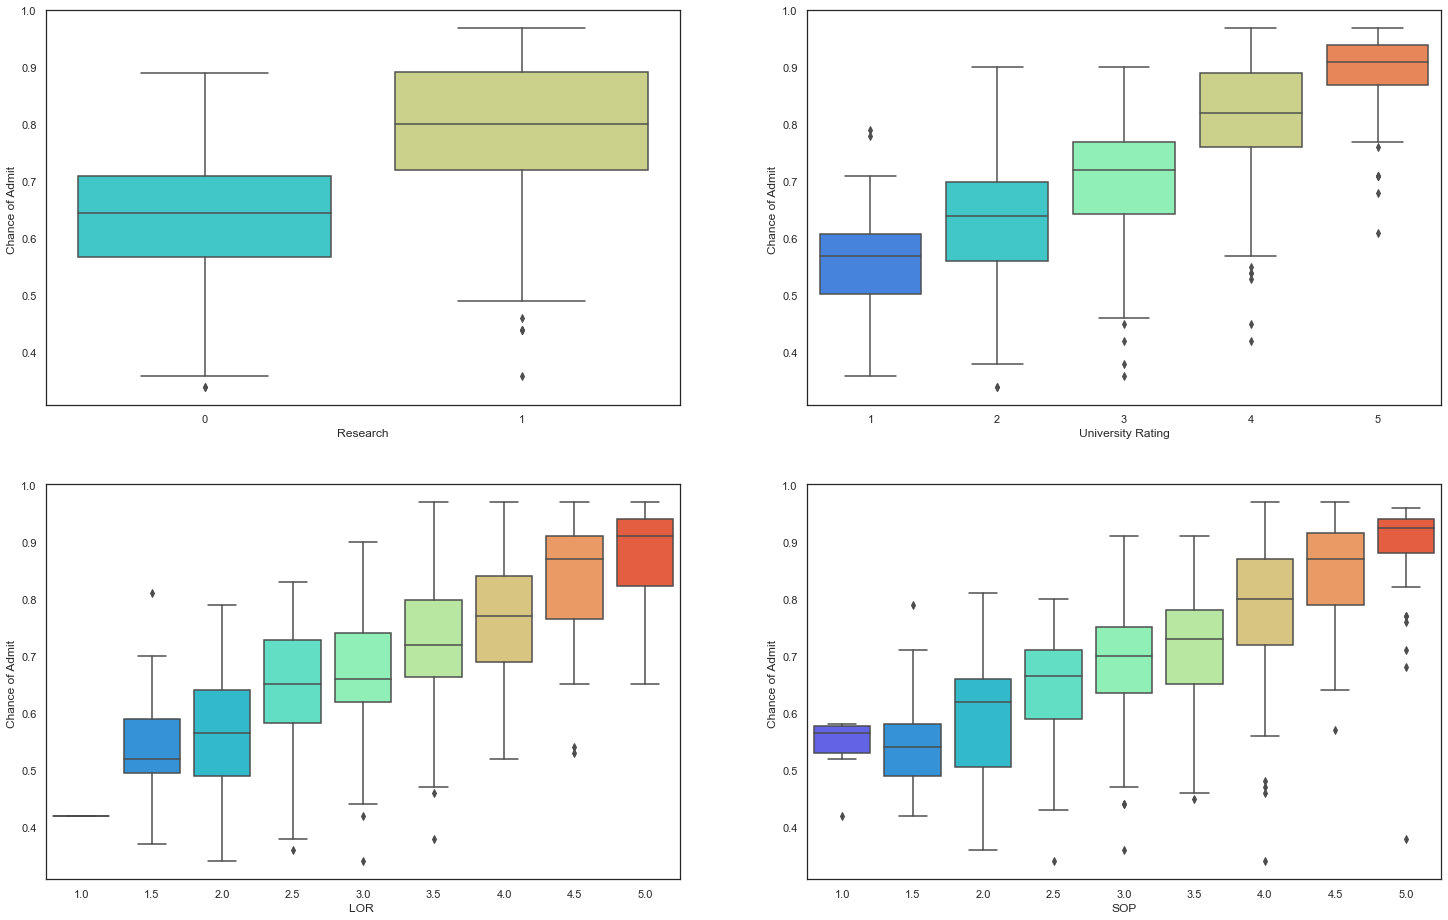

In [23]:
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25, 16))

sns.boxplot(x='Research',y='Chance of Admit ',data=ja,palette='rainbow',ax=axs[0][0])
sns.boxplot(x='University Rating',y='Chance of Admit ',data=ja,palette='rainbow',ax=axs[0][1])
sns.boxplot(x='LOR ',y='Chance of Admit ',data=ja,palette='rainbow',ax=axs[1][0])
sns.boxplot(x='SOP',y='Chance of Admit ',data=ja,palette='rainbow',ax=axs[1][1])

- As you can see from the graphs, rating increases the `Chance of Admit` also increases.
- Students who have the research experience have more chances of Admission as compared to other students who don't have the research experience.

<AxesSubplot:xlabel='Research', ylabel='SOP'>

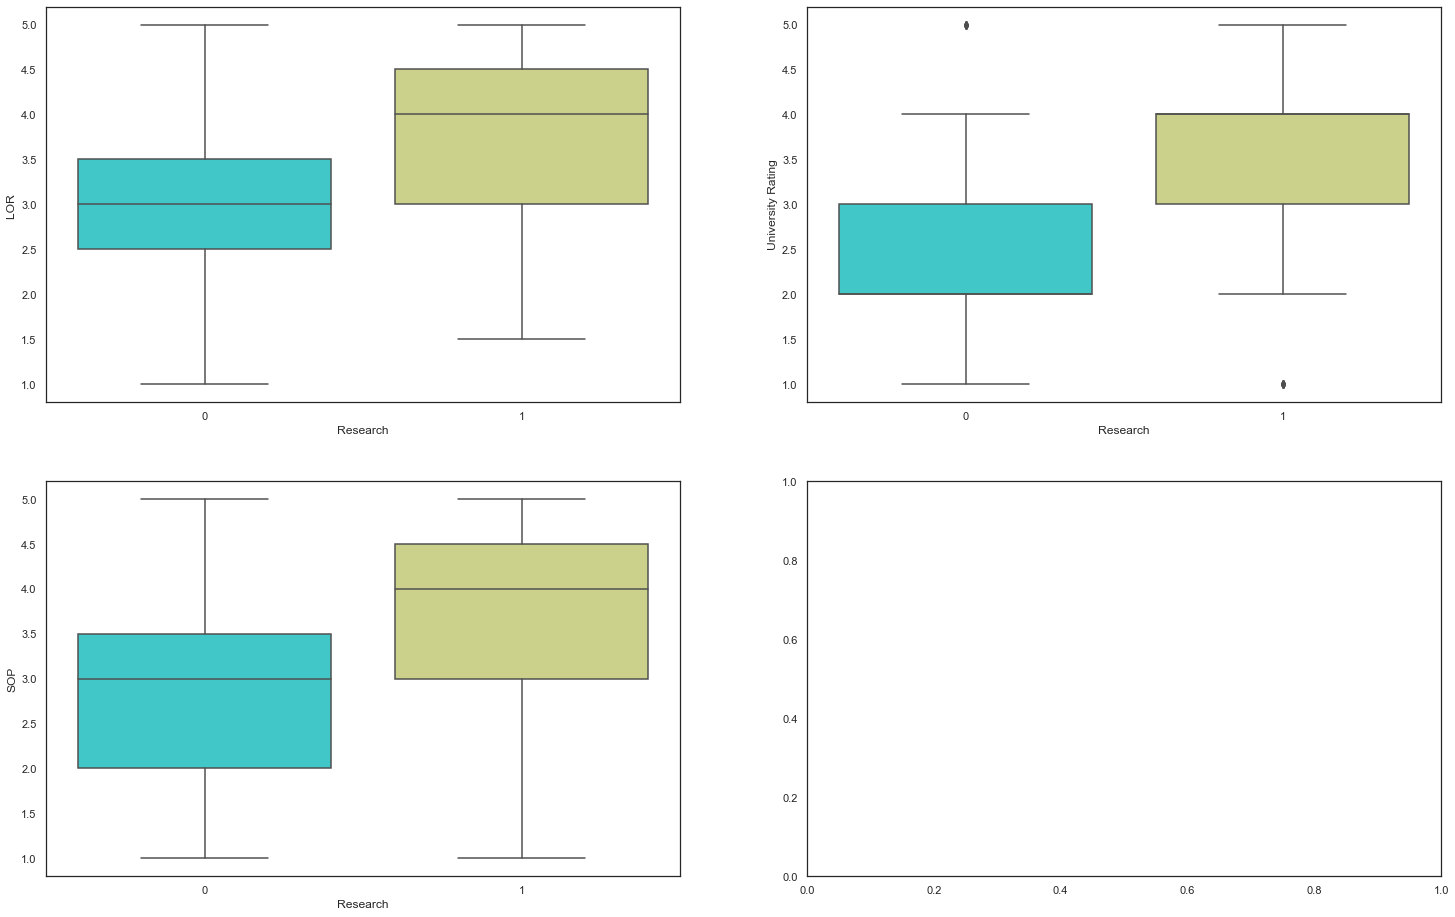

In [24]:

sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25, 16))
sns.boxplot(x='Research',y='LOR ',data=ja,palette='rainbow',ax=axs[0][0])
sns.boxplot(x='Research',y='University Rating',data=ja,palette='rainbow',ax=axs[0][1])
sns.boxplot(x='Research',y='SOP',data=ja,palette='rainbow',ax=axs[1][0])

<AxesSubplot:>

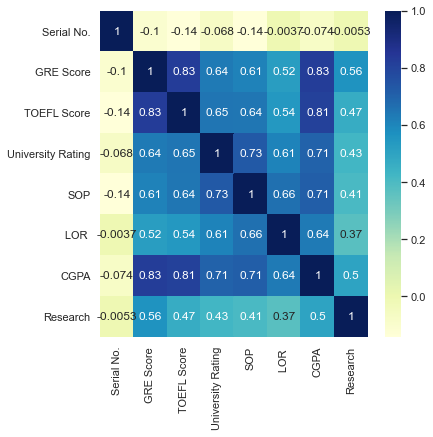

In [25]:
ja_withoutDep = ja.loc[:, ja.columns != 'Chance of Admit ']
sns.heatmap(ja_withoutDep.corr(), cmap="YlGnBu", annot=True)

## Data Preprocessing

In [26]:
ja=ja.drop(["Serial No."],axis=1)

In [27]:
ja[ja.duplicated()].sum()

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [28]:
ja.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values, outliers and duplicates present in the dataset.

In [91]:
from sklearn.model_selection import train_test_split
X = ja.loc[:, ja.columns != 'Chance of Admit ']
Y = ja.iloc[:,-1:]

In [92]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [93]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y, test_size=0.25, random_state=42)
xTrain.shape,yTrain.shape,xTest.shape,yTest.shape

((375, 7), (375, 1), (125, 7), (125, 1))

## Model building and Model performance evaluation

In [30]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Linear Regression

In [35]:
model = LinearRegression()
model.fit(xTrain,yTrain)

LinearRegression()

In [36]:
Prediction_Train = model.predict(xTrain)
Prediction_Test = model.predict(xTest)


In [37]:
model.coef_

array([[0.02443046, 0.02011865, 0.00270841, 0.00120129, 0.01576605,
        0.07058767, 0.0119798 ]])

In [38]:
val = model.coef_
coef = dict(zip(ja.columns,val[0]))
coef

{'GRE Score': 0.024430460562770113,
 'TOEFL Score': 0.020118654480711807,
 'University Rating': 0.002708407379898989,
 'SOP': 0.0012012907853470843,
 'LOR ': 0.015766050426469874,
 'CGPA': 0.07058766888465483,
 'Research': 0.01197980382400297}

In [39]:
model.intercept_

array([0.7223788])

In [40]:
def adjusted_r2(r2, p, n):
    """
    n: no of samples
    p: no of predictors
    r2: r2 score
    """
    adj_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))
    return adj_r2

In [41]:
np.sqrt(mean_squared_error(yTrain, Prediction_Train)),np.sqrt(mean_squared_error(yTest, Prediction_Test))

(0.059586205343085945, 0.059880967691013844)

In [42]:
mean_absolute_error(yTrain, Prediction_Train),mean_absolute_error(yTest, Prediction_Test)

(0.04251234385111577, 0.04311184801806062)

In [43]:
r2_train = r2_score(yTrain,Prediction_Train)
r2_test = r2_score(yTest,Prediction_Test)
r2_train,r2_test

(0.8223444375427977, 0.8163213016062121)

In [44]:
ntrain=yTrain.shape[0]
ptrain=yTrain.shape[1]
ntest=yTest.shape[0]
ptest=yTest.shape[1]
adjusted_r2(r2_train,p=ptrain,n=ntrain),adjusted_r2(r2_test,p=ptest,n=ntest)

(0.8218681491715988, 0.8148279788550431)

#### ----------   Linear Regression Model  -------------------------------------

#### Train MAE: 0.042, Test MAE: 0.043
#### Train RMSE: 0.059, Test RMSE: 0.06
#### Train R2_score: 0.822, Test R2_score: 0.816
#### Train Adjusted_R2: 0.821, Test Adjusted_R2: 0.814
#### Intercept: 0.7223788
####               Column      Coef
####           GRE Score  0.024430460562770113
#### 1        TOEFL Score  0.020118654480711807
#### 2  University Rating  0.002708407379898989
#### 3                SOP  0.0012012907853470843
#### 4               LOR   0.015766050426469874
#### 5               CGPA  0.07058766888465483
#### 6           Research  0.01197980382400297

### Lasso

In [45]:
from sklearn.linear_model import Lasso

In [46]:
lasso_model = Lasso(alpha=0.001,random_state=4)
lasso_model.fit(xTrain,yTrain)

Lasso(alpha=0.001, random_state=4)

In [47]:
lasso_Prediction_Train=lasso_model.predict(xTrain)
lasso_Prediction_Test=lasso_model.predict(xTest)

In [48]:
lasso_model.coef_

array([0.02424376, 0.01985848, 0.00256149, 0.00099299, 0.01528649,
       0.07076202, 0.01143653])

In [49]:
val_lasso = lasso_model.coef_
coef_lasso = dict(zip(ja.columns,val_lasso))
coef_lasso

{'GRE Score': 0.024243764962814274,
 'TOEFL Score': 0.019858483066282955,
 'University Rating': 0.0025614918733628763,
 'SOP': 0.0009929935059437961,
 'LOR ': 0.015286490473990052,
 'CGPA': 0.07076202194573294,
 'Research': 0.011436531908162368}

In [50]:
lasso_model.intercept_

array([0.72237612])

In [51]:
np.sqrt(mean_squared_error(yTrain, lasso_Prediction_Train)),np.sqrt(mean_squared_error(yTest, lasso_Prediction_Test))

(0.059600081749524664, 0.059787432431562225)

In [52]:
mean_absolute_error(yTrain, lasso_Prediction_Train),mean_absolute_error(yTest, lasso_Prediction_Test)

(0.04247424808254717, 0.042894391122243046)

In [53]:
lasso_r2_train = r2_score(yTrain,lasso_Prediction_Train)
lasso_r2_test = r2_score(yTest,lasso_Prediction_Test)
lasso_r2_train,lasso_r2_test


(0.8222616832265506, 0.8168946729888744)

In [54]:
lasso_ntrain=yTrain.shape[0]
lasso_ptrain=yTrain.shape[1]
lasso_ntest=yTest.shape[0]
lasso_ptest=yTest.shape[1]
adjusted_r2(lasso_r2_train,p=lasso_ptrain,n=lasso_ntrain),adjusted_r2(lasso_r2_test,p=lasso_ptest,n=lasso_ntest)

(0.821785172993914, 0.815406011793662)

#### ----------   Lasso Regression Model  -------------------------------------

#### Train MAE: 0.042, Test MAE: 0.0428
#### Train RMSE: 0.059, Test RMSE: 0.06
#### Train R2_score: 0.822, Test R2_score: 0.816
#### Train Adjusted_R2: 0.821, Test Adjusted_R2: 0.815
#### Intercept: 0.72237612
####               Column      Coef
####           GRE Score  0.024243764962814274
#### 1        TOEFL Score  0.019858483066282955
#### 2  University Rating  0.0025614918733628763
#### 3                SOP  0.0009929935059437961
#### 4               LOR   0.015286490473990052
#### 5               CGPA  0.07076202194573294
#### 6           Research  0.011436531908162368

### Ridge

In [55]:
from sklearn.linear_model import Ridge

In [56]:
R_model = Ridge(random_state=4)
R_model.fit(xTrain,yTrain)

Ridge(random_state=4)

In [57]:
R_Prediction_Train = R_model.predict(xTrain)
R_Prediction_Test = R_model.predict(xTest)

In [58]:
r2_score(yTrain,R_Prediction_Train),r2_score(yTest,R_Prediction_Test)

(0.8223393552092368, 0.8164147109958928)

In [94]:
R_model.intercept_

array([0.7223789])

In [60]:
R_val = R_model.coef_
R_coef = dict(zip(ja.columns,val[0]))
R_coef

{'GRE Score': 0.024430460562770113,
 'TOEFL Score': 0.020118654480711807,
 'University Rating': 0.002708407379898989,
 'SOP': 0.0012012907853470843,
 'LOR ': 0.015766050426469874,
 'CGPA': 0.07058766888465483,
 'Research': 0.01197980382400297}

In [61]:
np.sqrt(mean_squared_error(yTrain, R_Prediction_Train)),np.sqrt(mean_squared_error(yTest, R_Prediction_Test))

(0.059587057651905175, 0.059865739588874776)

In [62]:
mean_absolute_error(yTrain, R_Prediction_Train),mean_absolute_error(yTest, R_Prediction_Test)

(0.042506800213939475, 0.043126644111710286)

In [63]:
R_r2_train = r2_score(yTrain,R_Prediction_Train)
R_r2_test = r2_score(yTest,R_Prediction_Test)
R_r2_train,R_r2_test

(0.8223393552092368, 0.8164147109958928)

In [64]:
R_ntrain=yTrain.shape[0]
R_ptrain=yTrain.shape[1]
R_ntest=yTest.shape[0]
R_ptest=yTest.shape[1]
adjusted_r2(R_r2_train,p=R_ptrain,n=R_ntrain),adjusted_r2(R_r2_test,p=R_ptest,n=R_ntest)

(0.8218630532124788, 0.8149221476706562)

#### ----------   Ridge Regression Model  -------------------------------------

#### Train MAE: 0.042, Test MAE: 0.0431
#### Train RMSE: 0.059, Test RMSE: 0.06
#### Train R2_score: 0.822, Test R2_score: 0.816
#### Train Adjusted_R2: 0.821, Test Adjusted_R2: 0.815
#### Intercept: 0.7223789
####               Column      Coef
####           GRE Score  0.024430460562770113
#### 1        TOEFL Score  0.020118654480711807
#### 2  University Rating  0.002708407379898989
#### 3                SOP  0.0012012907853470843
#### 4               LOR   0.015766050426469874
#### 5               CGPA  0.07058766888465483
#### 6           Research  0.01197980382400297


- Since model is not overfitting, Results for Linear, Ridge and Lasso are the almost same.
- R2_score and Adjusted_r2 are almost the same. Hence there are no unnecessary independent variables in the data.

### Testing the assumptions of the linear regression model

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [66]:
def vif(newdf):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = newdf.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(newdf.values, i)
                              for i in range(len(newdf.columns))]
    return vif_data

In [67]:
vif(ja.iloc[:,:-1])

,feature,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


In [68]:
vif(ja.iloc[:,1:-1])

,feature,VIF
0,TOEFL Score,639.741892
1,University Rating,19.884298
2,SOP,33.733613
3,LOR,30.631503
4,CGPA,728.778312
5,Research,2.863301


In [69]:
vif(ja.iloc[:,2:-1])

,feature,VIF
0,University Rating,19.777410
1,SOP,33.625178
2,LOR,30.356252
3,CGPA,25.101796
4,Research,2.842227


In [70]:
vif(ja.iloc[:,2:-1].drop(columns=['SOP']))

,feature,VIF
0,University Rating,15.140770
1,LOR,26.918495
2,CGPA,22.369655
3,Research,2.819171


In [71]:
newja = ja.iloc[:,2:-1].drop(columns=['SOP'])
newja = newja.drop(columns=['LOR '], axis=1)
vif(newja)

,feature,VIF
0,University Rating,12.498400
1,CGPA,11.040746
2,Research,2.783179


In [72]:
newja = newja.drop(columns=['University Rating'])
vif(newja)

,feature,VIF
0,CGPA,2.455008
1,Research,2.455008


In [73]:
Xless = newja
Yless = ja.iloc[:,7:]

In [74]:
sc = StandardScaler()
Xless = sc.fit_transform(Xless)

In [75]:
xlessTrain,xlessTest,ylessTrain,ylessTest = train_test_split(Xless,Yless, test_size=0.25, random_state=42)

In [76]:
xlessTrain.shape,ylessTrain.shape,xlessTest.shape,ylessTest.shape

((375, 2), (375, 1), (125, 2), (125, 1))

In [77]:
modelless = LinearRegression()
modelless.fit(xlessTrain,ylessTrain)

LinearRegression()

In [78]:
lessPrediction_Train = modelless.predict(xlessTrain)
lessPrediction_Test = modelless.predict(xlessTest)

In [79]:
lessval = modelless.coef_
lesscoef = dict(zip(newja.columns,val[0]))
lesscoef

{'CGPA': 0.024430460562770113, 'Research': 0.020118654480711807}

In [80]:
modelless.intercept_

array([0.72284171])

In [81]:
np.sqrt(mean_squared_error(ylessTrain, lessPrediction_Train)),np.sqrt(mean_squared_error(ylessTest, lessPrediction_Test))

(0.0646560520269151, 0.06271222306438098)

In [82]:
mean_absolute_error(ylessTrain, lessPrediction_Train),mean_absolute_error(ylessTest, lessPrediction_Test)

(0.04751473812866798, 0.043796050091101636)

In [83]:
lessr2_train = r2_score(ylessTrain,lessPrediction_Train)
lessr2_test = r2_score(ylessTest,lessPrediction_Test)
lessr2_train,lessr2_test

(0.790826955667166, 0.7985415141354576)

In [84]:
ntrain=ylessTrain.shape[0]
ptrain=ylessTrain.shape[1]
ntest=ylessTest.shape[0]
ptest=ylessTest.shape[1]
adjusted_r2(lessr2_train,p=ptrain,n=ntrain),adjusted_r2(lessr2_test,p=ptest,n=ntest)

(0.790266170025523, 0.7969036402666402)

#### ----------   Linear Regression Model with two feature  -------------------------------------

#### Train MAE: 0.047, Test MAE: 0.0437
#### Train RMSE: 0.064, Test RMSE: 0.062
#### Train R2_score: 0.79, Test R2_score: 0.8
#### Train Adjusted_R2: 0.79, Test Adjusted_R2: 0.8
#### Intercept: 0.72284171


After removing collinear features using VIF and using only two features. R2_score and Adjusted_r2 are almost same as before the testing dataset.

#### Mean of Residuals
It is clear from RMSE that Mean of Residuals is almost zero.

#### Linearity of variables
It is quite clear from EDA that independent variables are linearly dependent on the target variables.

#### Test for Homoscedasticity

In [85]:
y_pred = model.predict(xTest)
residuals = (yTest - y_pred)
residuals["Chance of Admit "]

361    0.014184
73     0.043256
374   -0.179097
155    0.060543
104   -0.076501
         ...   
220    0.042969
176    0.011810
320    0.027974
153    0.043744
231    0.051164
Name: Chance of Admit , Length: 125, dtype: float64

#### Normality of Residuals

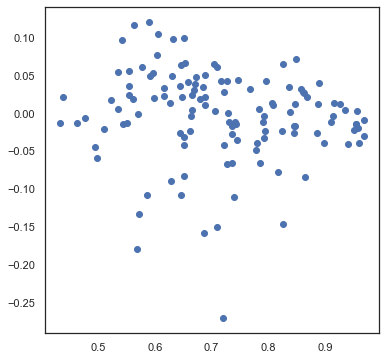

In [86]:
plt.scatter(y_pred, residuals)
plt.show()

Since the plot is not creating a cone type shape. Hence there is no homoscedasticity present in the data.

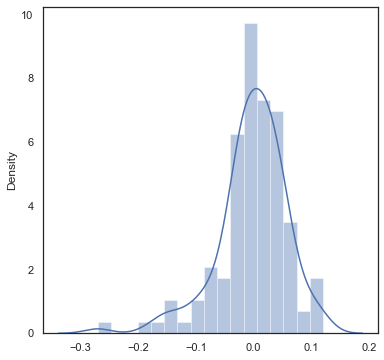

In [87]:
sns.distplot(residuals)
plt.show()

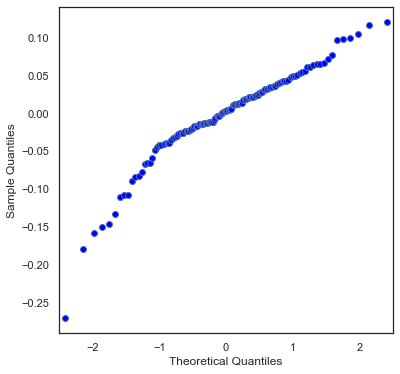

In [88]:
import statsmodels.api as sm
sm.qqplot(residuals["Chance of Admit "])
plt.show()

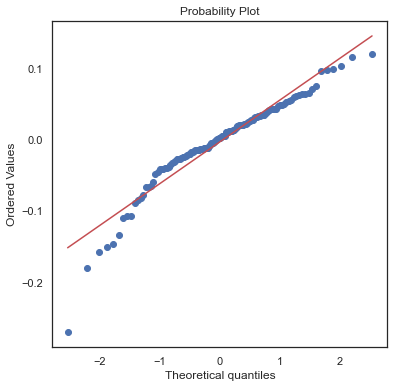

In [89]:
stats.probplot(residuals["Chance of Admit "], plot=plt)
plt.show()

### Insights 

1. Multicollinearity is present in the data.
2. After removing collinear features there are only two variables which are important in making predictions for the target variables that also giving the approx same R2 score
3. Indepedent variables are linearly correlated with dependent variables.

### Recommendations
1. `CGPA and Research` are the two variables which are important in making the prediction for `Chance of Admit`.
2. `CGPA` is the most important varibale in making the prediction for the `Chance of Admit`.
3. Following are the final model results on the test data:
    - **RMSE:** 0.043
    - **MAE:** 0.06
    - **R2_score:** 0.816
    - **Adjusted_R2:** 0.814